In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from pylab import rcParams

pd.set_option('display.max_columns', None)
missing_values = ["n/a", "na", "--", " ",""]
df = pd.read_csv("Telco_customer_churn.csv", na_values=missing_values)

<p style="color:blue;">In this section we will visualize our dataframe, explore different features and make preliminary conclusions.
we will decide the first steps of data wrangling accordingly.</p>

In [114]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


<p style="color:blue;">At first sight, we can see that all the samples share the same value of the columns 'Count', 'Country', 'State' and the only location related attributes that varie are the columns 'City' and 'Zip Code' so we will keep these ones and drop the others.
Also, we assume that in our analysis we should consider different cities and not different areas in the same city, so the columns 'Lat Long', 'Latitude', 'Longitude' will be dropped aswell.
Last but not least we will drop the column 'CustomorID' as it clearly has no impact on the output.</p>

<p style="color:blue;">We will be keeping all the remaining variables for now, but that doesn't mean they're all significant, but we will study the importance of each one in further steps using statistical methods.</p>

In [115]:
df.drop(['CustomerID'], axis=1, inplace=True)
df.drop(['Count'], axis=1, inplace=True)
df.drop(['Country'], axis=1, inplace=True)
df.drop(['State'], axis=1, inplace=True)
df.drop(['Lat Long'], axis=1, inplace=True)
df.drop(['Latitude'], axis=1, inplace=True)
df.drop(['Longitude'], axis=1, inplace=True)
df.drop(['Churn Label'], axis=1, inplace=True)
df.drop(['CLTV'], axis=1, inplace=True)
df.drop(['Churn Score'], axis=1, inplace=True)
df.drop(['City'], axis=1, inplace=True)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip Code           7043 non-null   int64  
 1   Gender             7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure Months      7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [117]:
df.describe()

,Zip Code,Tenure Months,Monthly Charges,Total Charges,Churn Value
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,93521.964646,32.371149,64.761692,2283.300441,0.265370
std,1865.794555,24.559481,30.090047,2266.771362,0.441561
min,90001.000000,0.000000,18.250000,18.800000,0.000000
25%,92102.000000,9.000000,35.500000,401.450000,0.000000
50%,93552.000000,29.000000,70.350000,1397.475000,0.000000
75%,95351.000000,55.000000,89.850000,3794.737500,1.000000
max,96161.000000,72.000000,118.750000,8684.800000,1.000000


In [118]:
df.dtypes

Zip Code               int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges        float64
Churn Value            int64
Churn Reason          object
dtype: object

<p style="color:blue;">At this stage we will look for categorical feautures and turn them into numerical values so we can later use them for plotting and training purposes.
First we will list the variables having only 2 possible values then apply the label encoding on them.</p>

In [119]:
#here we are looking for variables as described in the markdown above
def list_cols_2cat(df):
    cols = []
    cols_count = 0
    for col in df.columns[1:]:
        if df[col].nunique() <= 2:
            if df[col].dtype == 'object':
                cols_count += 1
                cols.append(col)
    print(format(cols_count) + ' columns have less than 3 possible values:')
    return cols
cols = list_cols_2cat(df) #function for listing categorical variables with two categories
print(cols)

6 columns have less than 3 possible values:
['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Paperless Billing']


Multiple Lines


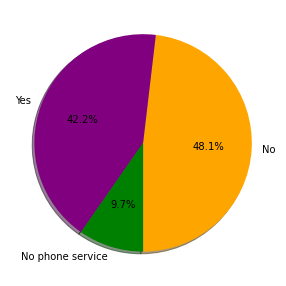



Internet Service


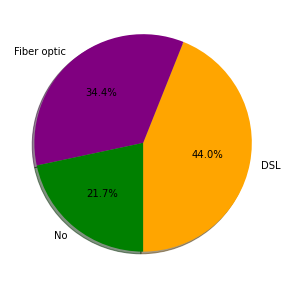



Online Security


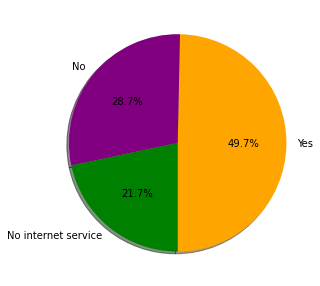



Online Backup


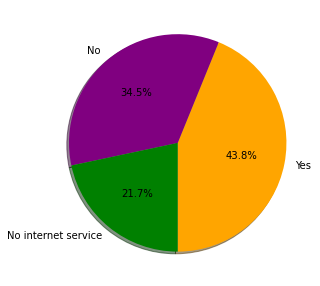



Device Protection


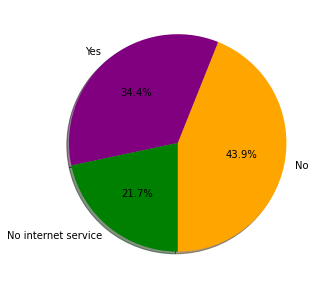



Tech Support


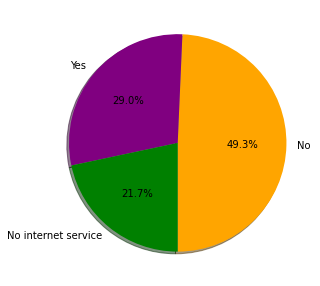



Streaming TV


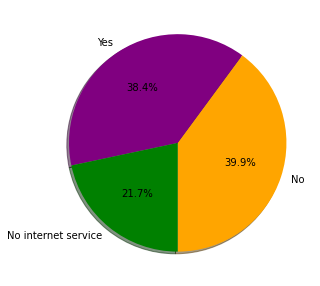



Streaming Movies


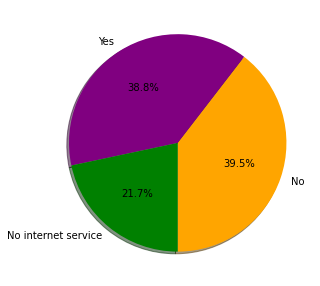



Contract


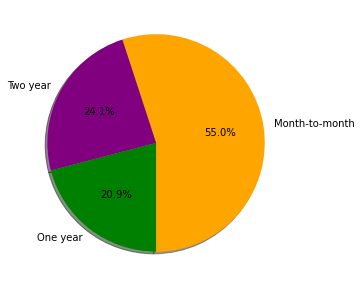



Payment Method


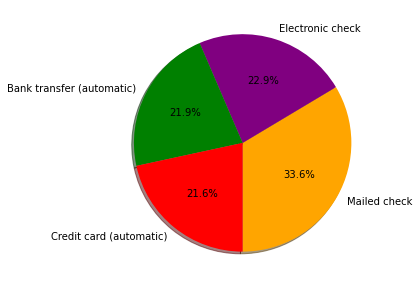

In [120]:
for col in df.columns:
    if df[col].nunique() <= 4:
        if df[col].dtype == 'object' and not(col in cols)  :
            print(col)
            sizes = df[col].value_counts(sort = True)
            colors = ["orange","purple","green","red"] 
            rcParams['figure.figsize'] = 5,5
            plt.pie(sizes,  labels=df[col].unique(), colors=colors,
                    autopct='%1.1f%%', shadow=True, startangle=270,)
            plt.show()
            print('\n')
          

<p style="color:blue;">The PieCharts corresponding to "Online Security", "Online Backup", "Device Protection", "Tech Support", "Streaming Tv" and "Streaming Movies" , all show that 21.7% of the customors have not subscribed for internet service, and that information is already present in the "Internet Service" column.
On the other hand, if we take "Streaming Movies" for instance, it could either be "Yes", "No" or "No internet Service" but "No" and "No Internet Service" mean the same thing, in other words we are dealing with redudant information.</p>

<p style="color:blue;">Same thing for "Multiple lines" feature, the category "No phone service" means the same as "No", so best thing to do in order to avoid redudancy is to merge categories that have the same meaning.</p>

In [121]:
df.loc[df["Multiple Lines"] == "No phone service", "Multiple Lines"] = "No"
df.loc[df["Internet Service"] == "No", ["Online Security", "Online Backup", "Device Protection",
                                        "Tech Support", "Streaming TV", "Streaming Movies" ]] = "No"

In [122]:
list_cols_2cat(df)

13 columns have less than 3 possible values:


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Paperless Billing']

<p style="color:blue;">Above is the final list of variables with exactly two possible values and on which we will apply the "Label Encoding":</p>

In [123]:
encoded_cols = []
label_encoder = LabelEncoder()
label_encoder_count = 0
for col in df.columns[1:]:
    if df[col].nunique() <= 2:
        if df[col].dtype == 'object':
            if (not(df[col].equals(df["Churn Reason"])) ):
                label_encoder.fit(df[col])
                df[col] = label_encoder.transform(df[col])
                label_encoder_count += 1
                encoded_cols.append(col)
print(format(label_encoder_count) + ' columns were encoded')
encoded_cols

13 columns were encoded


['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Paperless Billing']

<p style="color:blue;">Moving on, we will try to locate missing values in every column:</p>

In [124]:
df.isna().sum()

Zip Code                0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Value             0
Churn Reason         5174
dtype: int64

<p style="color:blue;">It's clear that Total charges contains 11 missing values and we need to take a look at their corresponding rows to decide wether to fill them or drop them.</p>

In [125]:
    print(df.loc[df["Total Charges"].isnull()]["Churn Value"].unique())

[0]


<p style="color:blue;">If we take a look at "Tenure Months" and "Churn Value" columns for this portion of data, which represents the cutomors with 0 Total Charges, we can see that they're all new customors that haven't yet churned and haven't spent enough periode to make their behavior significant, so this is non-significant data that better be dropped for lack of significance.</p>

In [126]:
df= df.dropna(subset=["Total Charges"])

In [127]:
df.loc[df["Churn Reason"] == "NaN"]

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason


<p style="color:blue;">we also have 5174 (5163 after dropping 11 lines in the previous step) missing value in the "Churn Reason" column which makes sense because that is the exact same number of customors that haven't churned yet (no churn -> no reason).
This column will be dropped anyway before reaching modeling phases, but for now we will fill every "NaN" with the string "Hasn't churned yet" so we can plot graphs to see which reasosn are more common etc..</p>

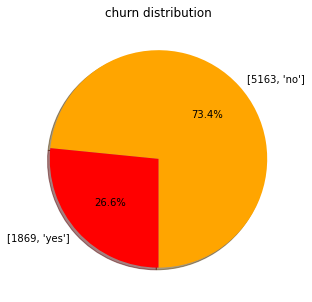

In [128]:
sizes = df["Churn Value"].value_counts(sort = True)
colors = ["orange","red"] 
rcParams['figure.figsize'] = 5,5
plt.pie(sizes,  labels=[[sizes[0],"no"],[sizes[1],"yes"]], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('churn distribution')
plt.show()



In [129]:
df.loc[df["Churn Reason"].isna(), "Churn Reason"] = "Hasn't churned yet"

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

df_new_x = df[['Internet Service', 'Contract', 'Payment Method', 'Gender']].copy()
# df_new_x.drop(['Churn Value'], axis=1, inplace=True)
# df_new_x.drop(['Churn Reason'], axis=1, inplace=True)
# df_new_x.drop(['City'], axis=1, inplace=True)
# df_new_x=pd.get_dummies(df_new_x, columns=['Internet Service', 'Contract', 'Payment Method'])
df_new_y = df["Churn Value"].copy()

In [131]:
df_new_x.dtypes

Internet Service    object
Contract            object
Payment Method      object
Gender               int32
dtype: object

In [132]:
encoded_cols = []
label_encoder = LabelEncoder()
label_encoder_count = 0
for col in df_new_x.columns[0:]:
    if df_new_x[col].dtype == 'object':
        label_encoder.fit(df[col])
        df_new_x[col] = label_encoder.transform(df_new_x[col])
        label_encoder_count += 1
        encoded_cols.append(col)
print(format(label_encoder_count) + ' columns were encoded')
encoded_cols

3 columns were encoded


['Internet Service', 'Contract', 'Payment Method']

In [133]:
bestFeautures = SelectKBest(chi2, k=4)
fit = bestFeautures.fit(df_new_x, df_new_y)
dfscores = pd.DataFrame(fit.pvalues_)
dfcolumns = pd.DataFrame(df_new_x.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Variable','Score']  
print(featureScores.nlargest(4,'Score')) 


           Variable          Score
3            Gender   6.140655e-01
0  Internet Service   1.827433e-03
2    Payment Method   1.395318e-14
1          Contract  9.186154e-244


<p style="color:blue;">The results above show that among the 4 variables, only 'Payment Method'and 'Contract' are in play when it comes to customors' tendancy to churn so based on this we will drop the other two.</p>

In [134]:
df.drop(['Gender'], axis=1, inplace=True)
df.drop(['Internet Service'], axis=1, inplace=True)

<img src="zip code.png" />

<p style="color:blue;">As we can see thanks to this plot, the distribution of 'Churn_Label' in terms of 'Zip_Code' is the same for samples with churn_value =0 and churn_value =1, so the variable Zip_Code has no impact on the 'Churn_Value' so it is to be Dropped.</p>

In [135]:
df.drop(['Zip Code'], axis=1, inplace=True)

<p style="color:blue;">Moving forward, we will use the 'Correlation Matrix' and 'Correlation Vector' for feature selection.</p>

Text(0.5, 1.0, 'Correlation Matrix')

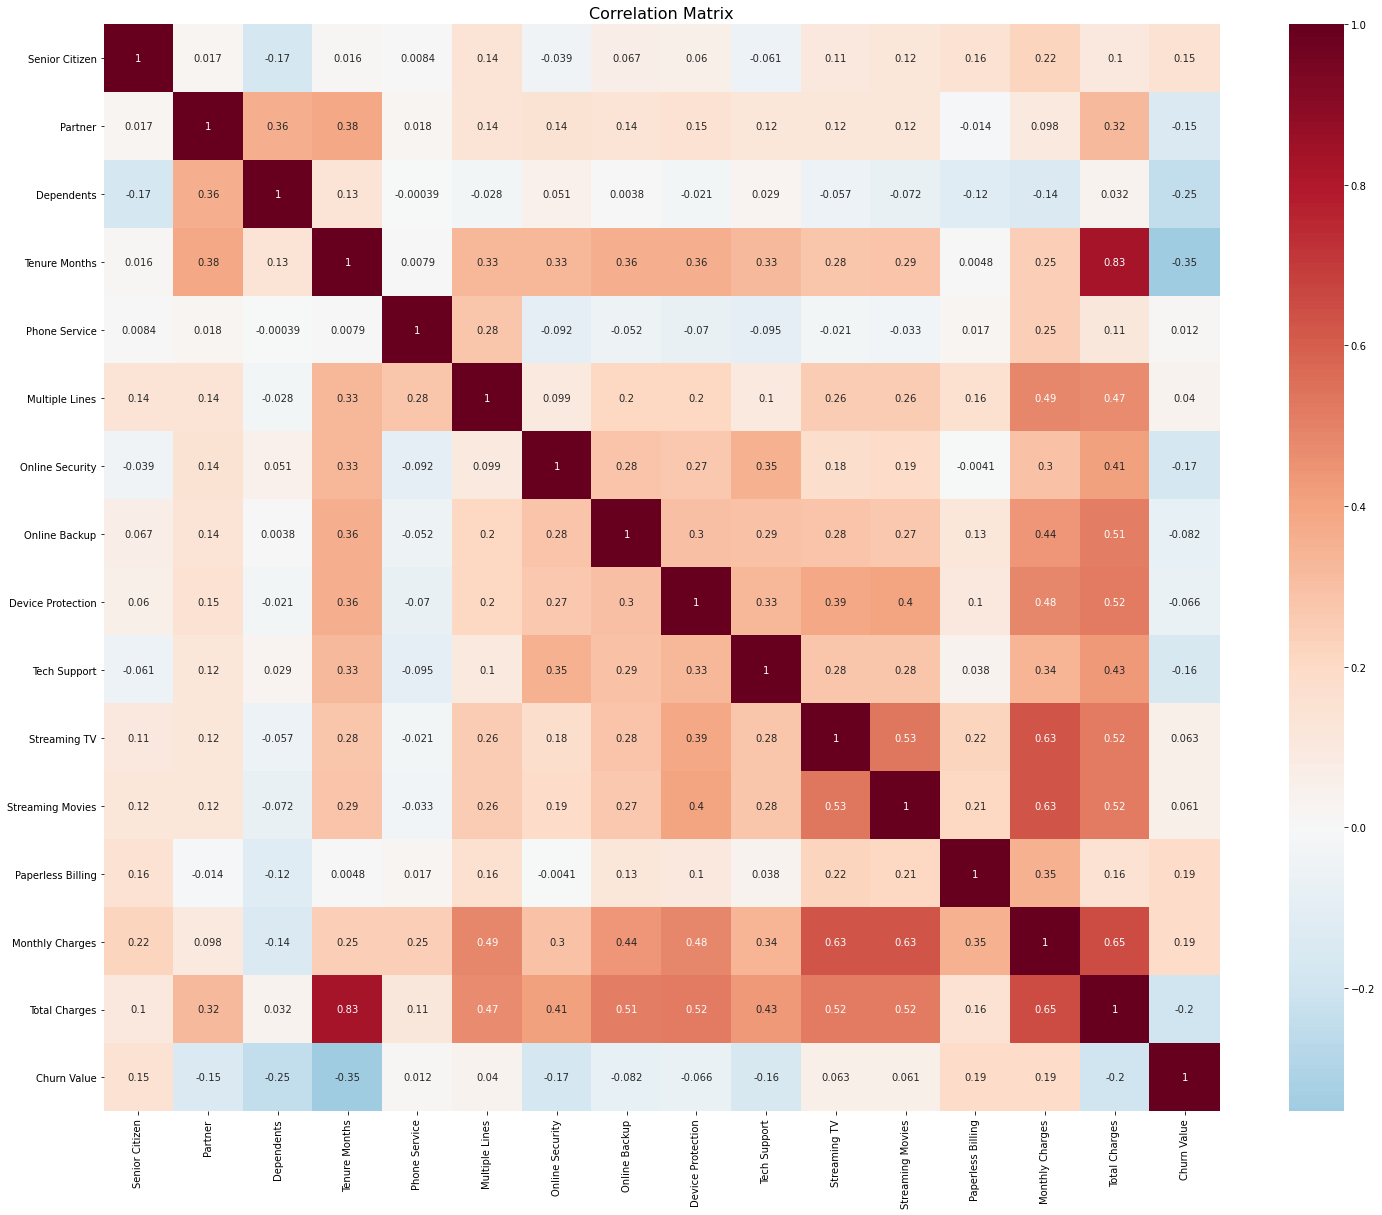

In [136]:
plt.figure(figsize=(25,20))
sns.heatmap(df.corr(),cmap="RdBu_r",center=0.0, annot=True)
plt.title('Correlation Matrix', fontsize=16)

<p style="color:blue;">This Matrix shows the Correlation index between all variables two by two but we will only focus on the correlation of each variable with the target so for that we will use correlation vector.</p>

Text(0.5, 1.0, 'Correlation Vector')

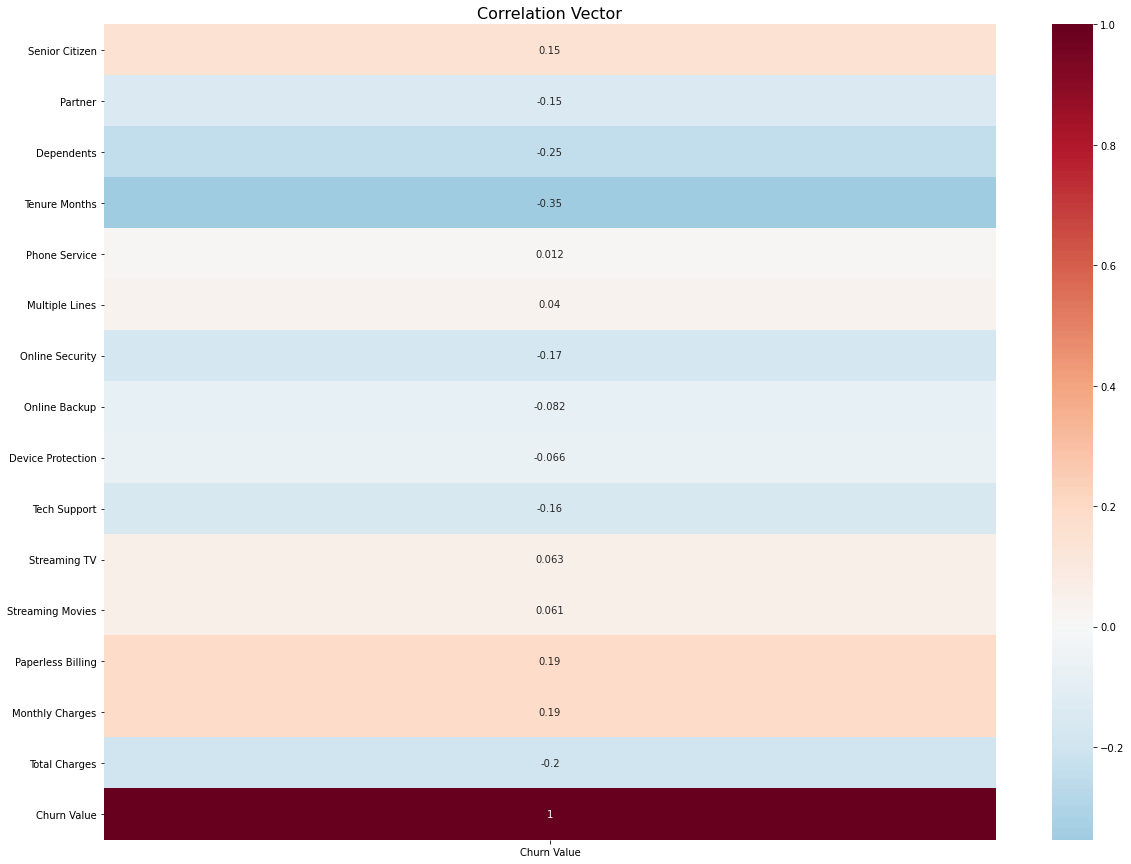

In [137]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr()[['Churn Value']],cmap="RdBu_r",center=0.0, annot=True)
plt.title('Correlation Vector', fontsize=16)

<p style="color:blue;">We already know that 'Total Charges' is a calculated column (Total Charges = Tenure Months * Monthly charges) in addtion to that we can see through the Correlation Matrix that it is highly correlated with 'Tenure Months' so it will not impact our model if we dropped it.</p>

<p style="color:blue;">If we take a look at the Correlation Vector, we can see that the correlation index of 'Device Protection', 'Multiple Lines', 'Online Backup', 'Phone Service' with the target variable is very low, so also these areto be taken away.</p>

<p style="color:blue;">we will also be denying the 'Churn Reason' column, because our purpose is to predict a cusotmor's tendancy to churn, and the churn reason appears in only a particular case where the predicted customor will churn (according to the model).</p>

In [138]:
df.drop(['Total Charges'], axis=1, inplace=True) #high correlation with another var andd it is calculated 
df.drop(['Device Protection'], axis=1, inplace=True)#low correlation correlation 
df.drop(['Multiple Lines'], axis=1, inplace=True)#low correlation correlation 
df.drop(['Online Backup'], axis=1, inplace=True)#low correlation correlation 
df.drop(['Phone Service'], axis=1, inplace=True)#low correlation correlation 
df.drop(['Churn Reason'], axis=1, inplace=True) #useless in predictive modelling

<p style="color:blue;">So we're left with only two categorical variables that have more than two categories, and we will procede with applying the OneHotEncoding on both of them.

In [139]:
df = pd.get_dummies(data=df, columns=['Payment Method'] ,  drop_first=True)
df = pd.get_dummies(data=df, columns=['Contract'] ,  drop_first=True)

In [140]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure Months,Online Security,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Churn Value,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Contract_One year,Contract_Two year
0,0,0,0,2,1,0,0,0,1,53.85,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,1,70.70,1,0,1,0,0,0
2,0,0,1,8,0,0,1,1,1,99.65,1,0,1,0,0,0
3,0,1,1,28,0,1,1,1,1,104.80,1,0,1,0,0,0
4,0,0,1,49,0,0,1,1,1,103.70,1,0,0,0,0,0


<p style="color:blue;">Now that we have our data cleaned, prepared and optimized, we will move on to the moddeling part, we're dealing with a classification problem and Logistic regression is quite performant in our case, and to get our model ready we need to go through a few steps:</p>

<p style="color:blue;"><br>-Split our data into train and test data
<br>-Standardize our data
<br>-initialize the logistic regression model with default parameters
<br>-find the best combination of hyper-parameters that will allow our model to give us the best score
<br>-create the final model
<br>-finally evaluate our model's performance</p>

In [141]:
#splitting data into train and test data  
from sklearn.model_selection import train_test_split
y=df['Churn Value']
x=df.drop(['Churn Value'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [142]:
#data standardization
from sklearn.preprocessing import MinMaxScaler 
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [143]:
#model intialization
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression( )
logReg.fit(x_train, y_train)
print("train score:",logReg.score(x_train, y_train))
print("\n test score:",logReg.score(x_test, y_test))

train score: 0.8110524177163755

 test score: 0.7962085308056872


In [144]:
#finding most optimal values for hyper-parameters
param =  {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'C' : np.linspace(0,10, 100),
          'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter': [100,1000, 2000, 3000]}

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(logReg, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

grid.best_params_

{'C': 0.30303030303030304,
 'max_iter': 100,
 'penalty': 'l1',
 'solver': 'liblinear'}

In [145]:
grid.best_score_

0.8090248029383847

In [146]:
#creating the final model with best hyper-parameters
logReg_best_params = LogisticRegression(C = 0.7070707070707071,max_iter=100, penalty="none", solver = "sag" )
logReg_best_params.fit(x_train, y_train)
print("train score:",logReg_best_params.score(x_train, y_train))
print("\n test score:",logReg_best_params.score(x_test, y_test))

train score: 0.8110524177163755

 test score: 0.795260663507109


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


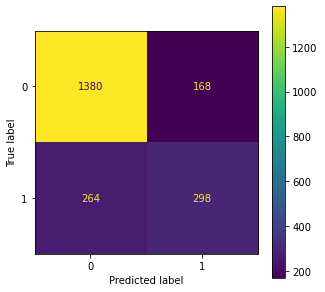

In [147]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(logReg_best_params, x_test, y_test)
plt.show()

In [148]:
y_pred = logReg_best_params.predict(x_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.839416  0.891473  0.864662      1548
           1   0.639485  0.530249  0.579767       562

    accuracy                       0.795261      2110
   macro avg   0.739451  0.710861  0.722214      2110
weighted avg   0.786164  0.795261  0.788780      2110



<p style="color:blue;">Our Current model has a score of 79.52% and According to the confusion matrix above, the precision for the first category (0.839) is significantly higher that the precision for the second category (0.639), that means that the error is more likely to occur when the prediction result is "1" (the customor has churned).</p>


<p style="color:blue;">Now that we're done with the linear regression model, we will try to elaborate a Decision Tree Model for our problem and for that we will go through almost the steps as before, then compare it to the previous moddel and see what we can get for a result.</p> 

In [149]:
#splitting data into train and test data  
from sklearn.tree import DecisionTreeClassifier
y=df['Churn Value']
x=df.drop(['Churn Value'], axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [151]:
#data standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [152]:
#model intialization
decTree = DecisionTreeClassifier(random_state=0)
decTree.fit(x_train, y_train)
print('Le train score est :', decTree.score(x_train, y_train))
print('Le test score est :', decTree.score(x_test, y_test))

Le train score est : 0.9971556277935798
Le test score est : 0.7165876777251184


In [153]:
#finding most optimal values for hyper-parameters
param =  {'criterion': ['gini', 'entropy'],
          'max_depth' : np.arange(1,10),}

grid = GridSearchCV(decTree, param_grid=param, cv =5, n_jobs=-1)
grid.fit(x_train, y_train)

grid.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [154]:
#creating the final model with best hyper-parameters
decTree_best_params = DecisionTreeClassifier(random_state=0, criterion ="gini", max_depth=4)
decTree_best_params.fit(x_train, y_train)
print('Le train score est :', decTree_best_params.score(x_train, y_train))
print('Le test score est :', decTree_best_params.score(x_test, y_test))

Le train score est : 0.8039414872003251
Le test score est : 0.7729857819905214


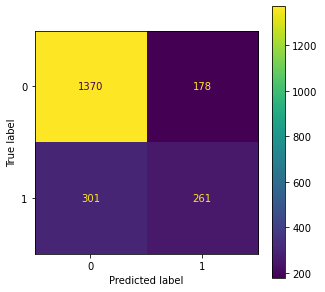

In [155]:
#confusion matrix
from sklearn.metrics import plot_confusion_matrix, classification_report
plot_confusion_matrix(decTree_best_params, x_test, y_test)
plt.show()

In [156]:
y_pred = decTree_best_params.predict(x_test)
print(classification_report(y_test, y_pred, digits=6))

              precision    recall  f1-score   support

           0   0.819868  0.885013  0.851196      1548
           1   0.594533  0.464413  0.521479       562

    accuracy                       0.772986      2110
   macro avg   0.707201  0.674713  0.686337      2110
weighted avg   0.759850  0.772986  0.763376      2110



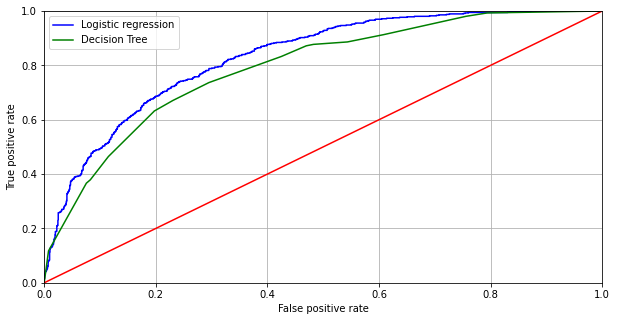

In [157]:
#models comparision in terms of AUC idicator
from sklearn.metrics import roc_curve
y_scores_logReg = logReg_best_params.predict_proba(x_test)
y_scores_decTree = decTree_best_params.predict_proba(x_test)

fprLr, tprLr, thresholdsLr = roc_curve(y_test, y_scores_logReg[:, 1])
fprDt, tprDt, thresholdsDt = roc_curve(y_test, y_scores_decTree[:, 1])

plt.figure(figsize=(10,5))
plt.plot(fprLr, tprLr, 'blue',label="Logistic regression" )
plt.plot(fprDt, tprDt, 'green',label="Decision Tree")
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0,1], [0,1] , 'r')
plt.grid(True)
plt.legend()
plt.show()

In [158]:
from sklearn.metrics import auc
print('area under curve for Logistic regression model: '+str(auc(fprLr,tprLr)))
print('area under curve for decision tree model: '+str(auc(fprDt, tprDt)))


area under curve for Logistic regression model: 0.8307246406797428
area under curve for decision tree model: 0.7912224015375138


<p style="color:blue;">According to the score, confusion matrix related to this model and the AUC plot above we can say that the logistic regression model is more effective in our case,  we can see that the Area Under The curve for the decision tree model is higher than the other (0.7912 decision tree and 0.8307 logistic regression ) , so we will retain the first model as most performant for its higher precision (lower false negative and false positive rates), higher score and higher AUC.</p>